Nicholas<br>
Dicoding Proyek 1 Machine learning Terapan

Salary Prediction<br>
Dataset : https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data

# Loading Dataset

In [ ]:

# load dataset

# install kaggle package
!pip install -q kaggle

# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

!kaggle datasets download -d mrsimple07/salary-prediction-data

# Ekstrak ZIP
from zipfile import ZipFile
file_name ="/content/salary-prediction-data.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Extraction Complete")



kaggle.json
  0% 0.00/16.2k [00:00<?, ?B/s]
100% 16.2k/16.2k [00:00<00:00, 24.8MB/s]
Extraction Complete


In [ ]:
import pandas as pd
df = pd.read_csv('/content/salary_prediction_data.csv', encoding='latin-1')
df.head(10)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
5,PhD,19,Rural,Director,27,Female,156312.936208
6,PhD,4,Rural,Director,60,Female,130567.649455
7,PhD,13,Suburban,Director,49,Female,148707.740759
8,Bachelor,20,Urban,Engineer,25,Female,95945.275429
9,PhD,14,Urban,Analyst,58,Female,133339.389682


# Data Analysis and Cleaning

In [ ]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [ ]:
df.dropna()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


# Data Exploration and Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Boxplot experience with mean marks')

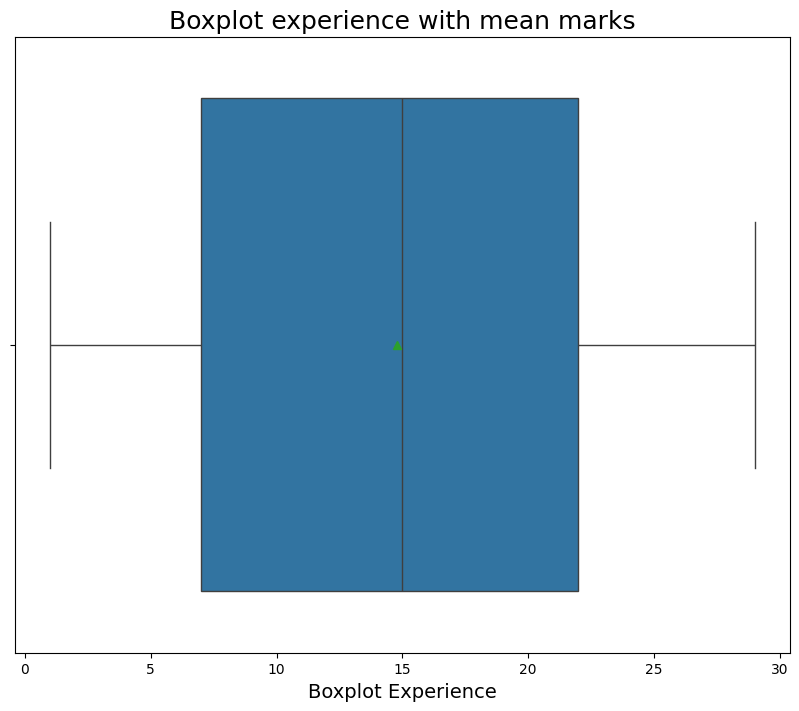

In [ ]:
# figure size
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn with means
# using showmeans=True
sns.boxplot(x=df['Experience'],showmeans=True)
plt.xlabel("Boxplot Experience", size=14)
plt.title("Boxplot experience with mean marks", size=18)



Text(0.5, 1.0, 'Boxplot usia with mean marks')

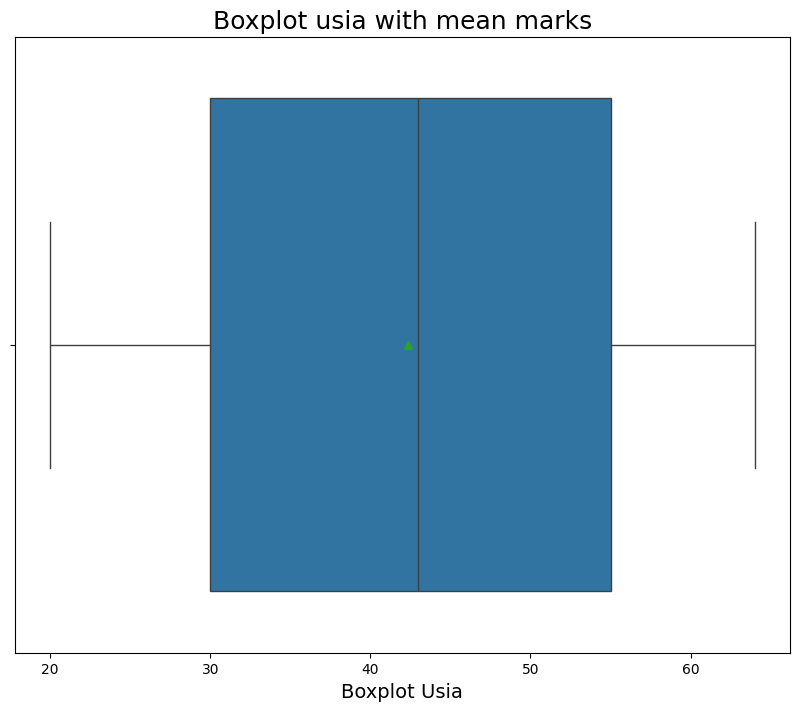

In [ ]:
# figure size
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn with means
# using showmeans=True
sns.boxplot(x=df['Age'],showmeans=True)
plt.xlabel("Boxplot Usia", size=14)
plt.title("Boxplot usia with mean marks", size=18)



Text(0.5, 1.0, 'Boxplot Salary with mean marks')

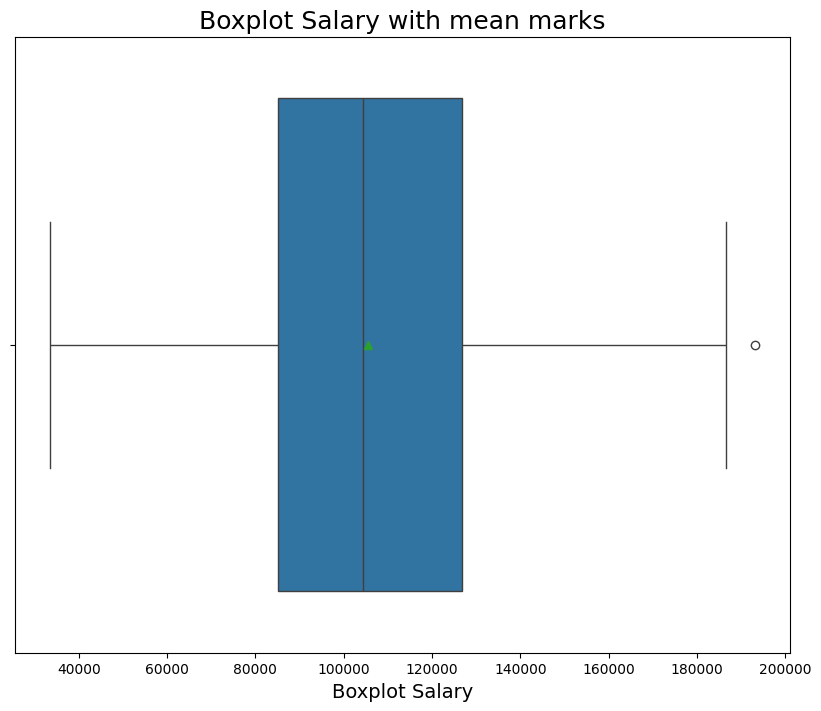

In [ ]:
# figure size
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn with means
# using showmeans=True
sns.boxplot(x=df['Salary'],showmeans=True)
plt.xlabel("Boxplot Salary", size=14)
plt.title("Boxplot Salary with mean marks", size=18)


In [ ]:
#Outlier handling
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

<ipython-input-10-8cec5e88a9d8>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-8cec5e88a9d8>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-10-8cec5e88a9d8>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(999, 7)

In [ ]:

categorical_features = ['Education','Location','Job_Title','Gender']
numerical_features = ['Experience','Age']


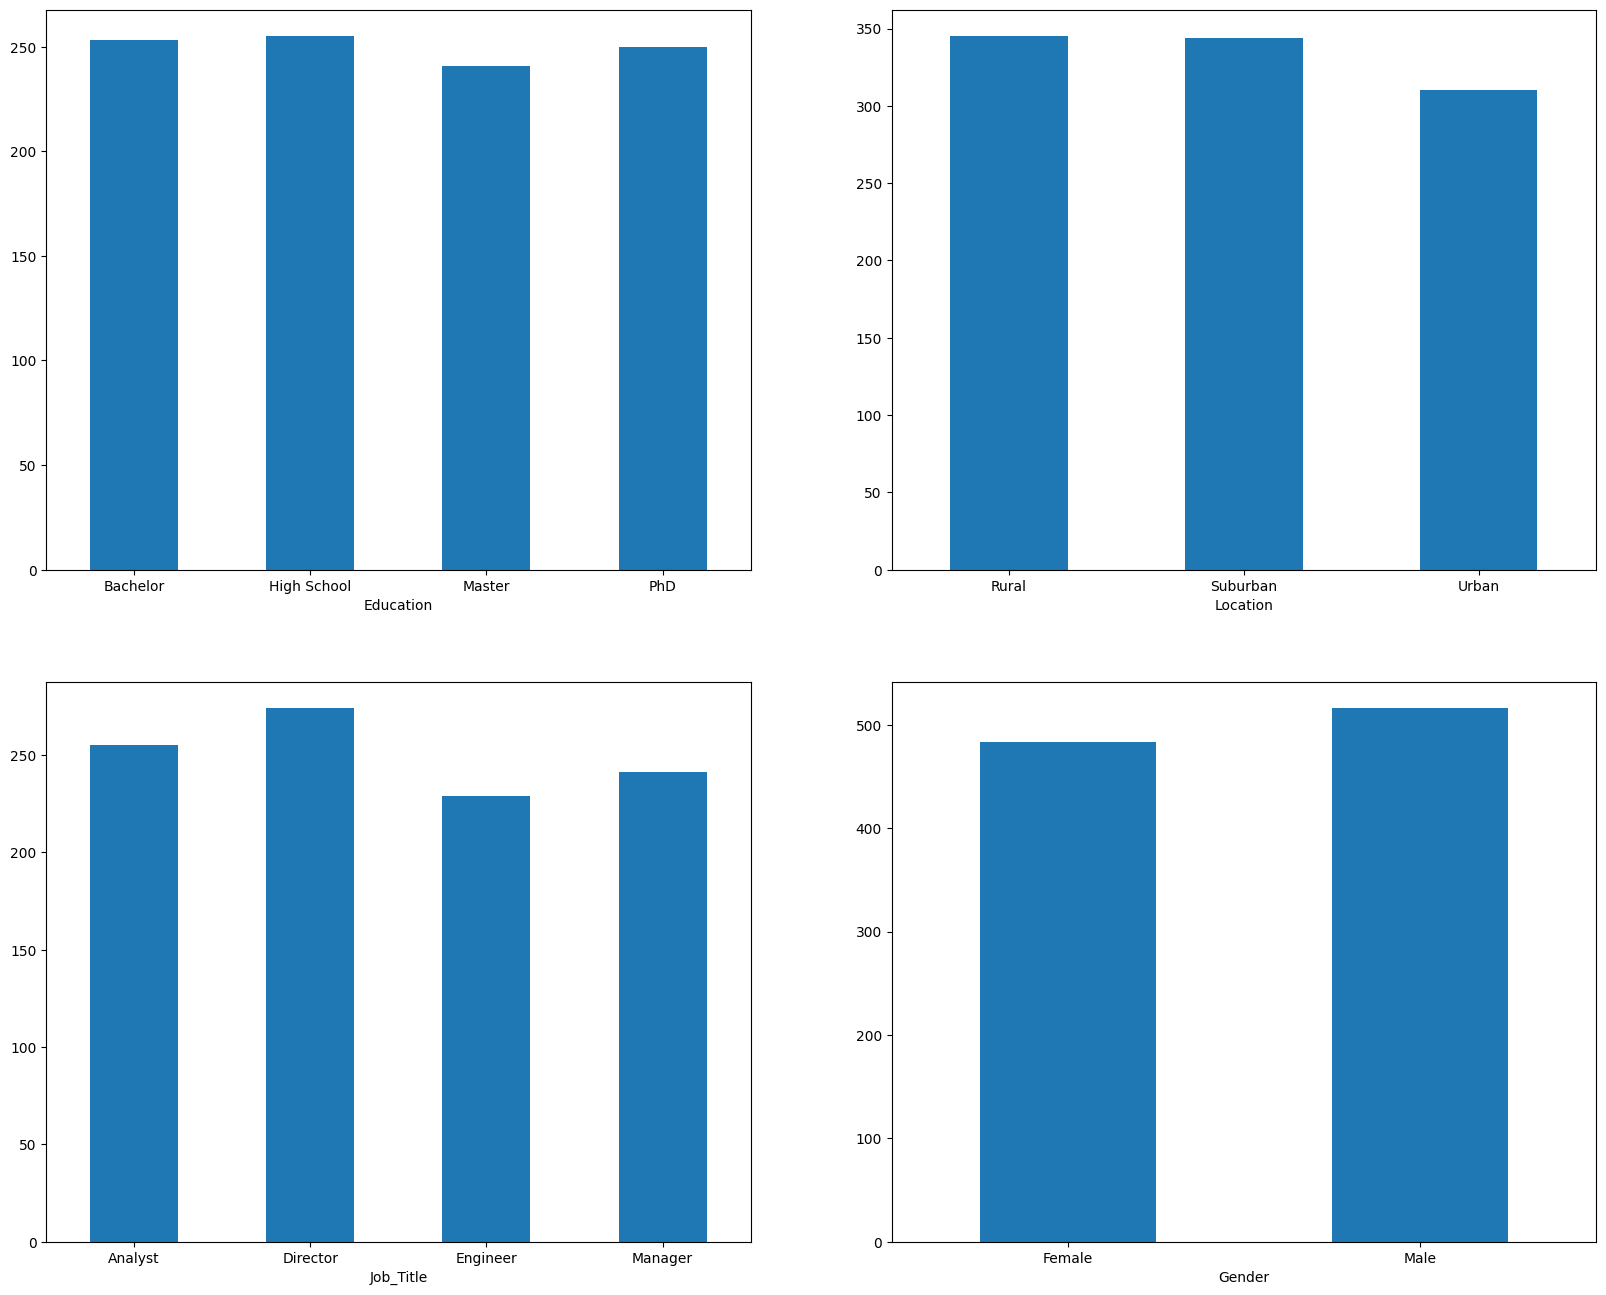

In [ ]:
plt.subplots(2, 2, figsize=(20, 16))

for i, col in enumerate(categorical_features):
  plt.subplot(2, 2, i + 1)
  df.groupby(col).size().plot(kind='bar', rot=0)

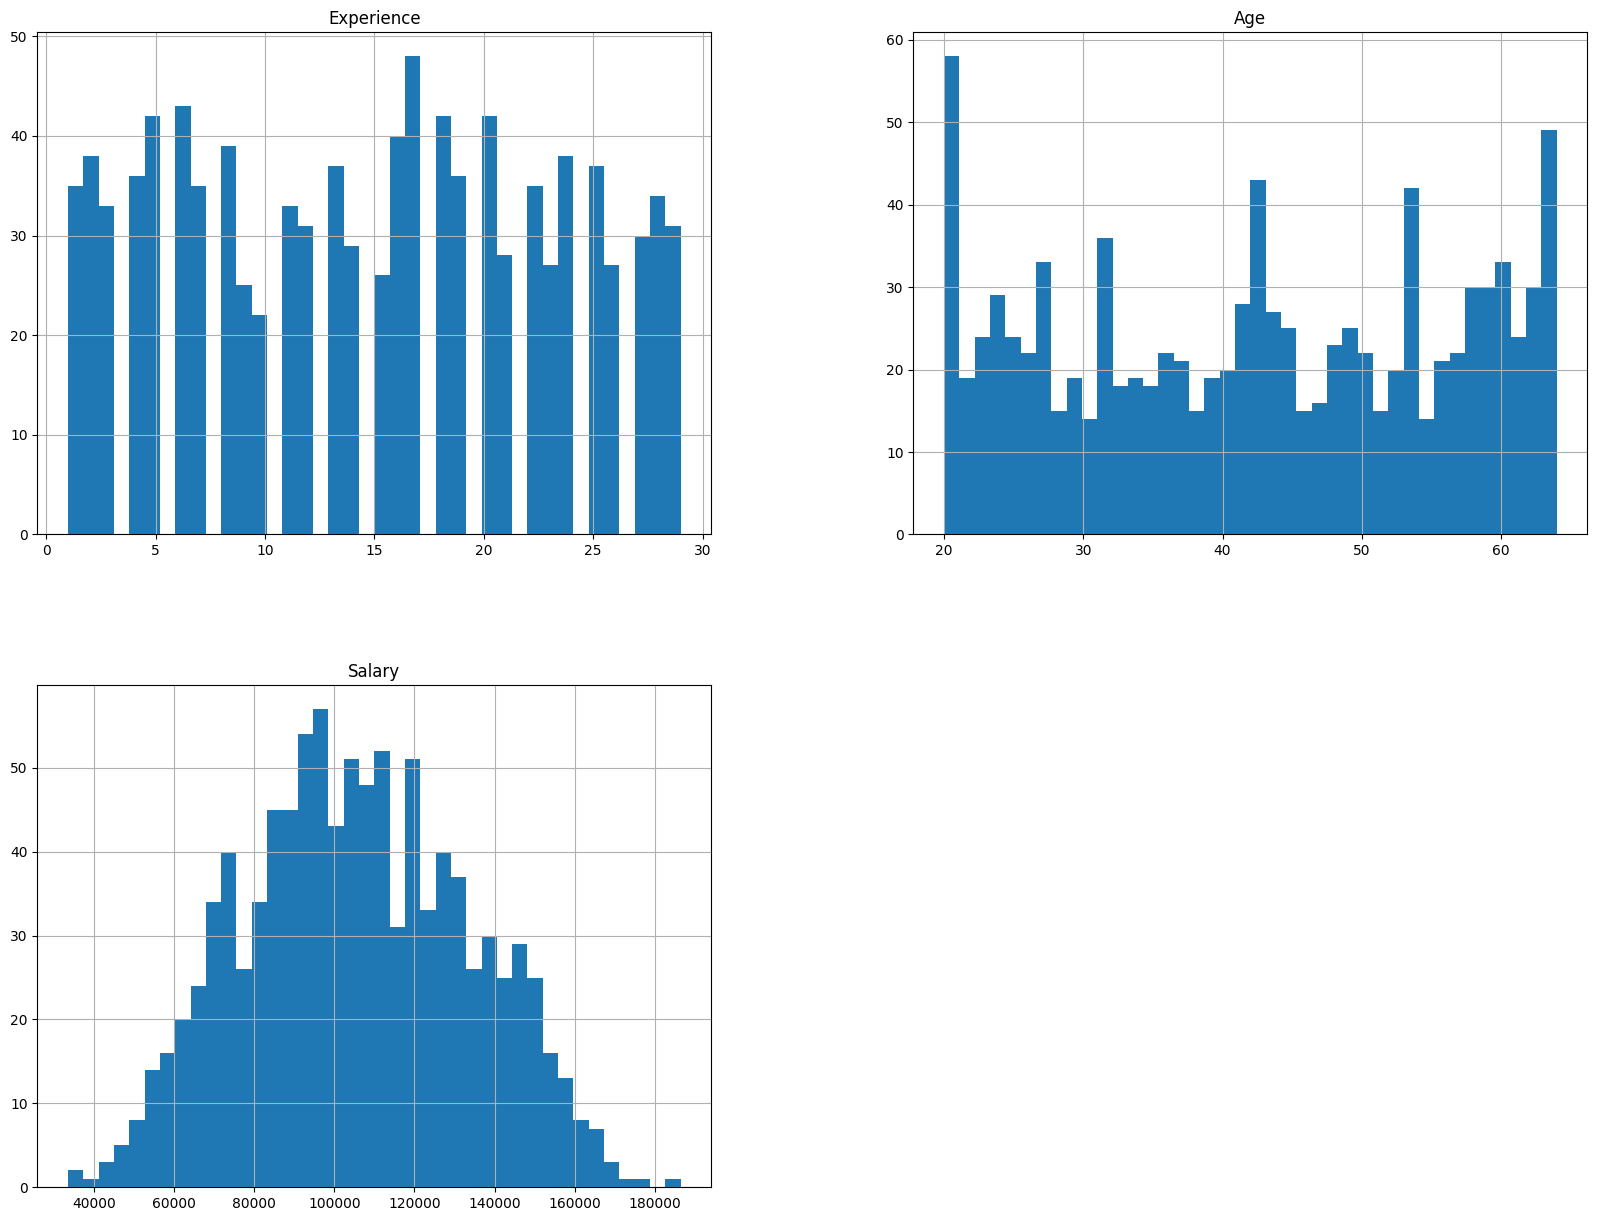

In [ ]:
df.hist(bins=40, figsize=(20,15))
plt.show()

# MultiVariate Analysis

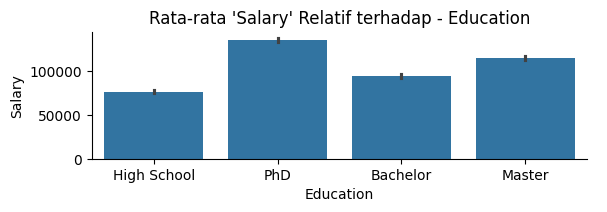

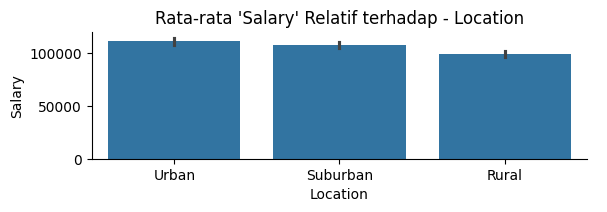

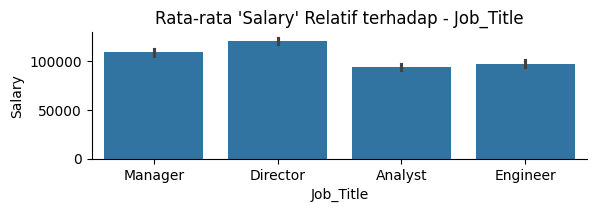

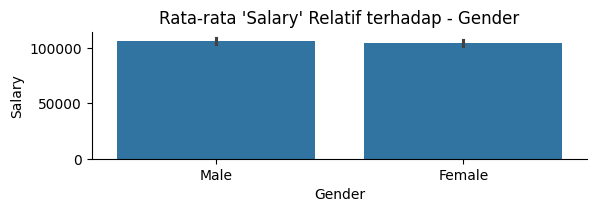

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 2, aspect = 3,  data=df)
  plt.title("Rata-rata 'Salary' Relatif terhadap - {}".format(col))

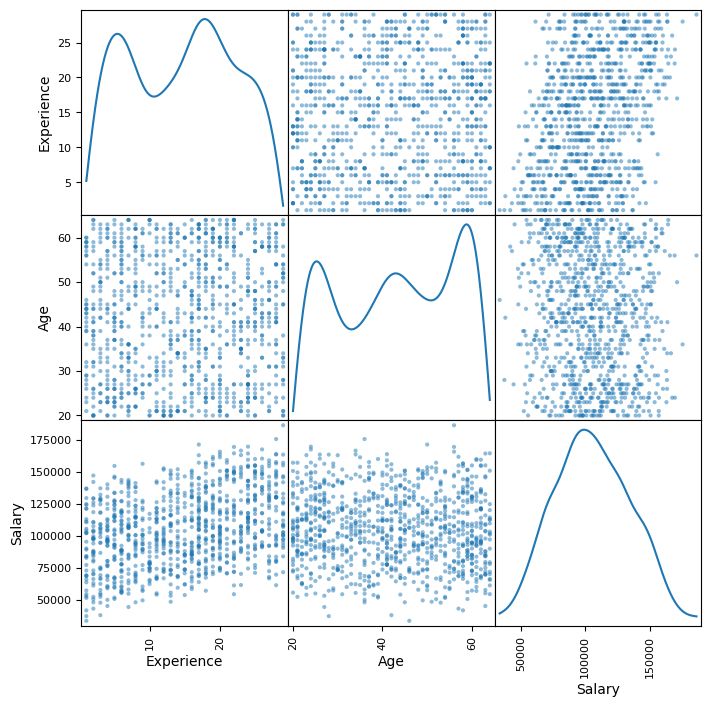

In [ ]:
pd.plotting.scatter_matrix(df.loc[:,["Experience","Age","Salary"]], diagonal="kde",figsize=(8,8))
plt.show()

<ipython-input-16-4a4fae2a1b6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2) # Fungsi Cor -> evaluasi skor korelasi


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

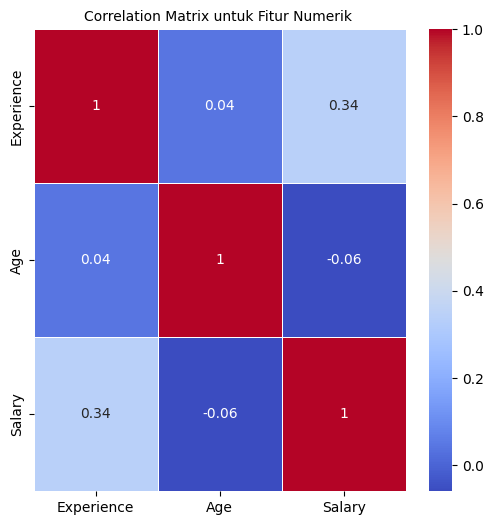

In [ ]:
plt.figure(figsize=(6, 6))
correlation_matrix = df.corr().round(2) # Fungsi Cor -> evaluasi skor korelasi

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=10)

# One Hot Encoding

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Education'], prefix='Education')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Location'], prefix='Location')],axis=1)
df= pd.concat([df, pd.get_dummies(df['Job_Title'], prefix='Job_Title')],axis=1)
df= pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender')],axis=1)

df.drop(['Education','Location','Gender','Job_Title'], axis=1, inplace=True)
df.head(10)

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Female,Gender_Male
0,8,63,84620.053665,0,1,0,0,0,0,1,0,0,0,1,0,1
1,11,59,142591.255894,0,0,0,1,0,1,0,0,1,0,0,0,1
2,28,61,97800.255404,1,0,0,0,0,1,0,0,0,0,1,1,0
3,29,45,96834.671282,0,1,0,0,1,0,0,0,1,0,0,0,1
4,25,26,132157.786175,0,0,0,1,0,0,1,1,0,0,0,1,0
5,19,27,156312.936208,0,0,0,1,1,0,0,0,1,0,0,1,0
6,4,60,130567.649455,0,0,0,1,1,0,0,0,1,0,0,1,0
7,13,49,148707.740759,0,0,0,1,0,1,0,0,1,0,0,1,0
8,20,25,95945.275429,1,0,0,0,0,0,1,0,0,1,0,1,0
9,14,58,133339.389682,0,0,0,1,0,0,1,1,0,0,0,1,0


# Split Data and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(["Salary"],axis =1)
y = df["Salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 999
Total # of sample in train dataset: 899
Total # of sample in test dataset: 100


In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data train
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])



In [ ]:
print(x_train[numerical_features])

     Experience       Age
600   -1.665448 -0.830552
432    1.080025  1.450806
221    0.125078  0.052554
974    1.199394  0.126146
526    1.557499  1.303621
..          ...       ...
106    1.438131 -1.566474
270   -0.949238 -1.492882
861    0.244446 -0.830552
435   -1.665448 -0.241815
102   -1.187975 -1.492882

[899 rows x 2 columns]


# Modeling with Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(x,y):
    algos = {
        'linear': {
            'model':LinearRegression(),
            'params':{}
        },

        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3,5, 10, 15,20,25,30],
                'weights' : ['uniform','distance'],
                'p':[1,2],
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']

            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 100,200,300],
                'loss':['linear', 'square', 'exponential']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [4, 8, 16, 32,64,100],
                'min_samples_split': [2,3,5,10],
                'min_samples_leaf':[1,2,5]
            }
        }

    }
    scores = []

    for algo_name, config in algos.items():
      print(algo_name)
      gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False, scoring='neg_mean_squared_error')
      gs.fit(x,y)
      scores.append({ 'model': algo_name, 'best_score': gs.best_score_, 'best_params': gs.best_params_ })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid_search_model(x,y)

linear
knn
boosting
random_forest


,model,best_score,best_params
0,linear,-9.991271e+07,{}
1,knn,-4.119102e+08,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': ..."
2,boosting,-1.409926e+08,"{'learning_rate': 0.1, 'loss': 'square', 'n_es..."
3,random_forest,-1.177528e+08,"{'max_depth': 64, 'min_samples_leaf': 5, 'min_..."


In [ ]:
scaler.fit(x_test[numerical_features])
x_test[numerical_features] = scaler.transform(x_test.loc[:, numerical_features])

In [ ]:
from sklearn.metrics import mean_squared_error
model_acc = pd.DataFrame(index=['mse'])
knn = KNeighborsRegressor(algorithm= 'brute', n_neighbors= 10, p= 1, weights= 'distance')
knn.fit(x_train, y_train)
model_acc.loc['mse', 'knn'] = knn.score(x_test,y_test)
knn.score(x_test,y_test)

0.8603756332175906

In [ ]:
lin = LinearRegression()
lin.fit(x_train, y_train)
model_acc.loc['mse', 'lin'] = lin.score(x_test,y_test)
lin.score(x_test,y_test)

0.8911068741347211

In [ ]:
ada = AdaBoostRegressor(learning_rate= 0.1, loss= 'square', n_estimators= 300)
ada.fit(x_train, y_train)
model_acc.loc['mse', 'ada'] = ada.score(x_test,y_test)
ada.score(x_test,y_test)

0.8356791466336086

In [ ]:
rf = RandomForestRegressor(max_depth= 64, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 75)
rf.fit(x_train, y_train)
model_acc.loc['mse', 'rf'] = rf.score(x_test,y_test)
rf.score(x_test,y_test)

0.8760371971046674

# Evaluation

In [ ]:
import numpy as np
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'],
                   index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': ada,'Linear':lin}
for name, model in model_dict.items():
  mse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(x_train)))
  mse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(x_test)))
mse

,train,test
KNN,559.812751,11263.296808
RF,8361.389998,10612.815498
Boosting,11353.131771,12218.876106
Linear,9808.750429,9946.840474


In [ ]:
prediksi = x_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10].round(1)}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_Linear
579,118399.9,105253.6,107311.6,117290.7,111566.4
896,129257.6,118264.1,123817.7,117622.4,122856.4
546,77809.5,70317.1,73990.9,77819.1,69806.8
436,120089.7,115737.5,135063.7,132672.5,131411.2
679,47721.5,53228.3,56713.5,63009.7,50330.0


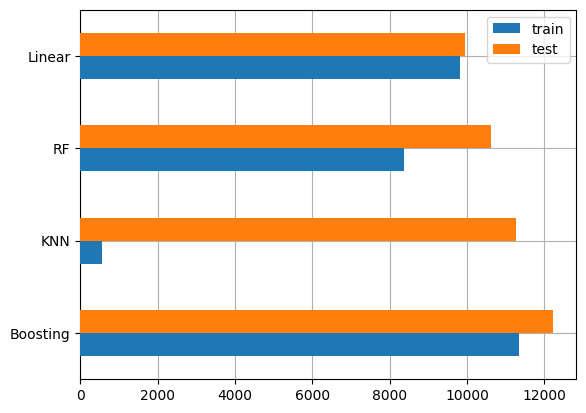

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)